# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from joypy import joyplot

# Import Data

In [2]:
worldcups = pd.read_csv(r"C:\Users\yudhi\OneDrive\Desktop\School\Courses\Data_Mining\Data\FIFA_World_Cup_Data\WorldCups.csv", index_col=0, parse_dates=True)
players = pd.read_csv(r"C:\Users\yudhi\OneDrive\Desktop\School\Courses\Data_Mining\Data\FIFA_World_Cup_Data\WorldCupPlayers.csv", index_col=0, parse_dates=True)
matches = pd.read_csv(r"C:\Users\yudhi\OneDrive\Desktop\School\Courses\Data_Mining\Data\FIFA_World_Cup_Data\WorldCupMatches.csv", index_col=0, parse_dates=True)
scorers = pd.read_csv(r"C:\Users\yudhi\OneDrive\Desktop\School\Courses\Data_Mining\Data\FIFA_World_Cup_Data\Scorers.csv")

# Data Exploration

In [3]:
worldcups.head(5)

,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Year,,,,,,,,,
1930-01-01,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1934-01-01,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
1938-01-01,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
1950-01-01,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
1954-01-01,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [4]:
players.head(5)

,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
RoundID,,,,,,,,
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
matches.head(5)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
Year,,,,,,,,,,,,,,,,,,,
1930-01-01,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1930-01-01,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
1930-01-01,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
1930-01-01,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
1930-01-01,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
scorers.head(5)

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil


In [7]:
print('Worldcups shape: ', worldcups.shape)
print('Players shape: ', players.shape)
print('Matches shape: ', matches.shape)
print('Scorers shape: ', scorers.shape)

Worldcups shape:  (20, 9)
Players shape:  (37784, 8)
Matches shape:  (4572, 19)
Scorers shape:  (1295, 4)


In [8]:
players.isnull().sum()
worldcups.isnull().sum()
matches.isnull().sum()
scorers.isnull().sum()

Player     0
Goals      0
Years      0
Country    0
dtype: int64

# 1. What is the distribution of goals per country?

In [9]:
#subset all goals by home and away teams from matches df
# drop null values rows
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [10]:
#renaming columns
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [11]:
home.head()

,Countries,Goals
Year,,
1930-01-01,France,4.0
1930-01-01,USA,3.0
1930-01-01,Yugoslavia,2.0
1930-01-01,Romania,3.0
1930-01-01,Argentina,1.0


In [12]:
away.head()

,Countries,Goals
Year,,
1930-01-01,Mexico,1.0
1930-01-01,Belgium,0.0
1930-01-01,Brazil,1.0
1930-01-01,Peru,1.0
1930-01-01,France,0.0


In [13]:
#append all goals in one df
goals = home.append(away)

C:\Users\yudhi\AppData\Local\Temp\ipykernel_7004\34425471.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = home.append(away)


In [14]:
goals.head()

,Countries,Goals
Year,,
1930-01-01,France,4.0
1930-01-01,USA,3.0
1930-01-01,Yugoslavia,2.0
1930-01-01,Romania,3.0
1930-01-01,Argentina,1.0


In [15]:
goals.shape

(1704, 2)

In [16]:
#subset some countries
goals_c = goals.query('Countries in ["Brazil", "France", "England", "Germany", "Argentina", "Spain", "Netherlands", "Uruguay", "USA"]')

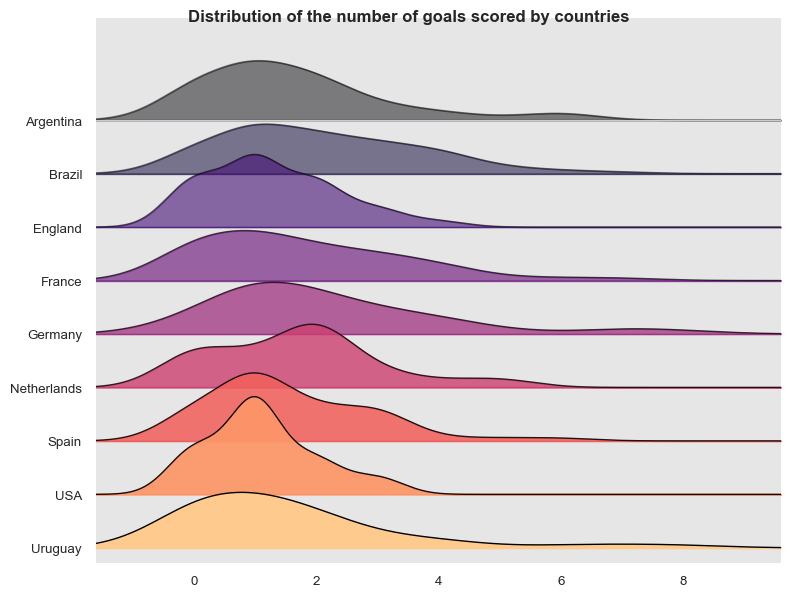

In [17]:
sns.set_style("white", {"axes.facecolor": ".9"})
sns.set_context("paper")

# plot ridge graph
joyplot(data=goals_c[['Countries', 'Goals']], by='Countries',grid="y", linewidth=1,figsize=(8,6), legend=False, fade=True, colormap = plt.cm.magma)
plt.figtext(.24,.97,"Distribution of the number of goals scored by countries", fontweight="bold", fontsize=12)
plt.savefig('dist.png')
plt.show()

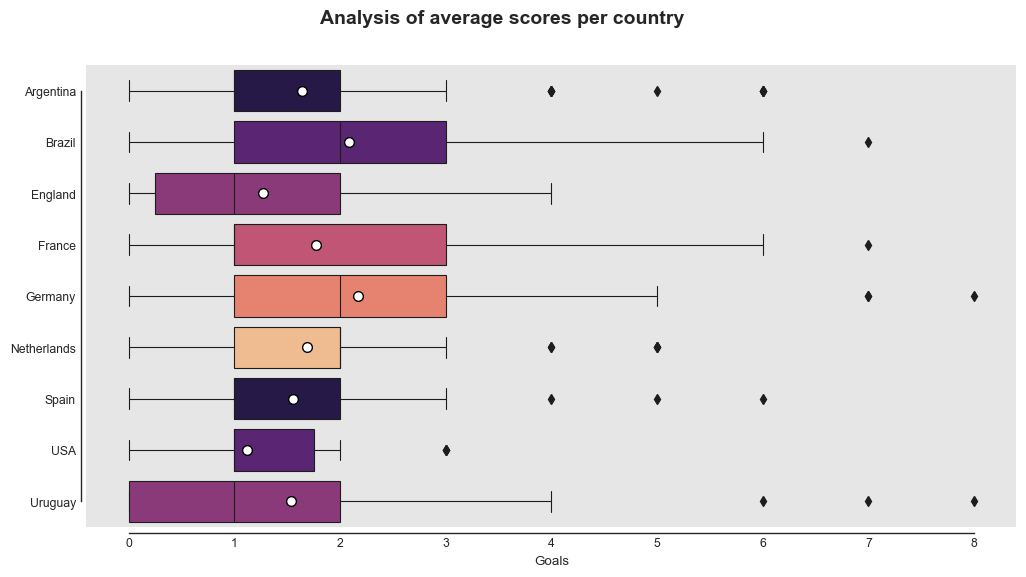

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
cpal=sns.color_palette("magma")
plt.style.use("seaborn-dark")

country = ["Brazil", "France", "England", "Germany", "Argentina", "Spain", "Netherlands", "Uruguay", "USA"]
country.sort()


ax = sns.boxplot(y=goals_c['Countries'], x=goals_c['Goals'], showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"}, linewidth=.8, palette=cpal, order=country);
ax.set(ylabel=None)
plt.figtext(.32,.95,"Analysis of average scores per country", fontweight="bold", fontsize=14)
sns.despine(offset=4, trim=True);
plt.savefig('box.png')
plt.show()

# 2. How is the trend for the sum of goals over the years?

In [19]:
goals_t = goals.pivot_table('Goals', index=goals.index, columns='Countries', aggfunc='sum')
goals_t=goals_t.fillna(0)
goals_t.head()

Countries,Algeria,Angola,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Cameroon,...,Ukraine,Uruguay,Wales,Yugoslavia,Zaire,"rn"">Bosnia and Herzegovina","rn"">Republic of Ireland","rn"">Serbia and Montenegro","rn"">Trinidad and Tobago","rn"">United Arab Emirates"
Year,,,,,,,,,,,,,,,,,,,,,
1930-01-01,0.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,15.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1934-01-01,0.0,0.0,2.0,0.0,7.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1938-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,...,0.0,15.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1954-01-01,0.0,0.0,0.0,0.0,17.0,5.0,0.0,8.0,0.0,0.0,...,0.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
goals_t.loc[pd.Timestamp('1942-01-01')] = 0
goals_t.loc[pd.Timestamp('1946-01-01')] = 0

In [21]:
goals_t = goals_t.sort_index()
goals_t.head()

Countries,Algeria,Angola,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Bulgaria,Cameroon,...,Ukraine,Uruguay,Wales,Yugoslavia,Zaire,"rn"">Bosnia and Herzegovina","rn"">Republic of Ireland","rn"">Serbia and Montenegro","rn"">Trinidad and Tobago","rn"">United Arab Emirates"
Year,,,,,,,,,,,,,,,,,,,,,
1930-01-01,0.0,0.0,18.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,15.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1934-01-01,0.0,0.0,2.0,0.0,7.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1938-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0.5, 0, '')]

<Figure size 640x480 with 0 Axes>

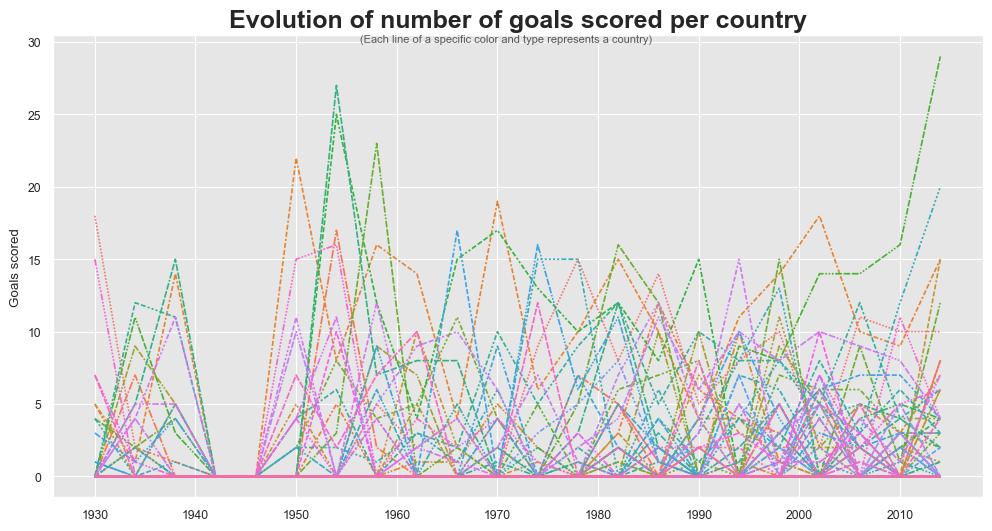

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#f, axes = plt.subplots(1, 2)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.despine(offset=10, trim=True);
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax = sns.lineplot(data = goals_t, legend=False)
ax.set_title('Evolution of number of goals scored per country', fontweight='bold', fontsize=18)
plt.text(x=-5000, y=30, s='(Each line of a specific color and type represents a country)', fontsize=8, alpha=0.75)
ax.set(ylabel='Goals scored')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel=None)

<Figure size 1200x1000 with 0 Axes>

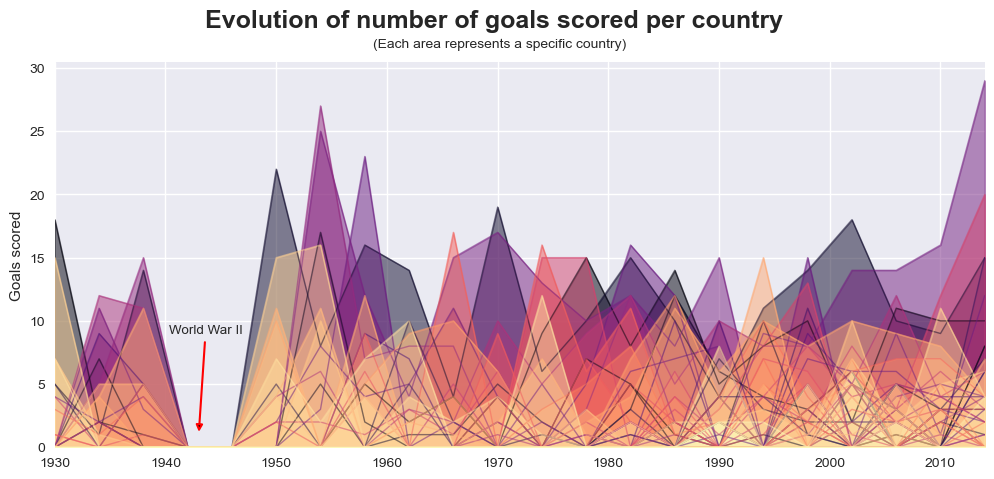

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 10))



ax = goals_t.plot.area(stacked=False, legend=False, linewidth=1,figsize=(12,5), colormap="magma")
plt.figtext(.25,.95,'Evolution of number of goals scored per country', fontweight="bold", fontsize=18)
plt.figtext(.39,.91,'(Each area represents a specific country)',  fontsize=10)
ax.set(xlabel=None)
ax.set(ylabel='Goals scored')
plt.annotate('World War II',xy=(-27,1),xytext=(-29.7,9),
             arrowprops=dict(arrowstyle='-|>', fc="k", ec="r", lw=1.5))
plt.show()

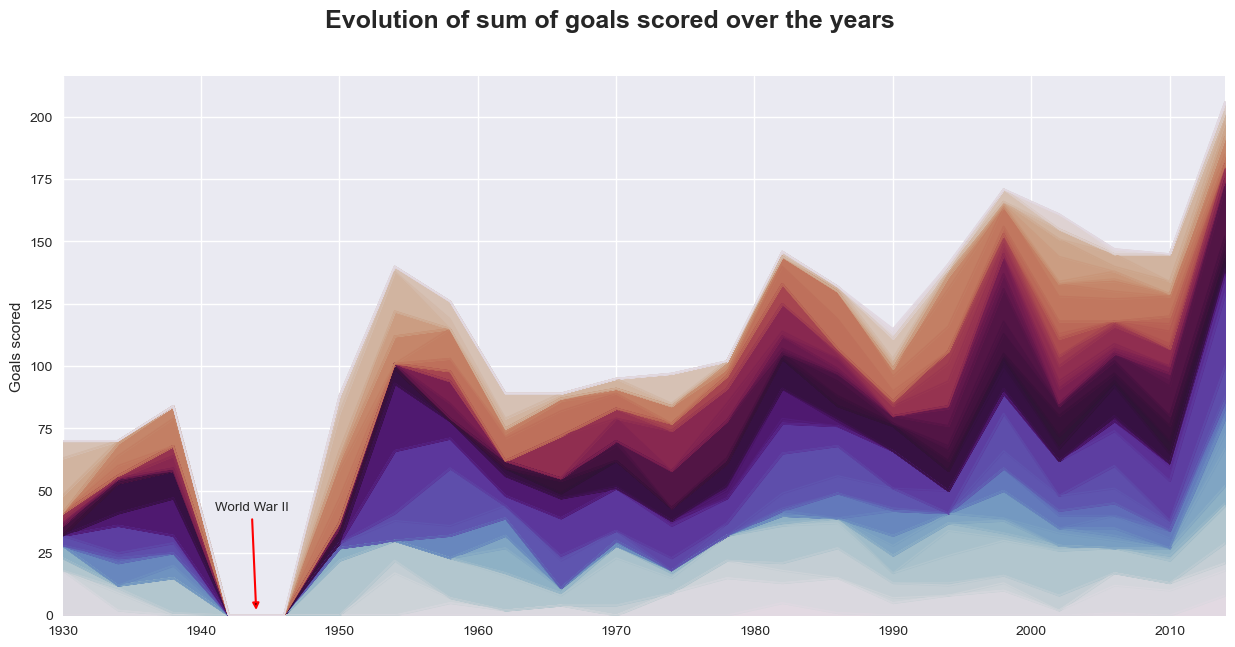

In [24]:
plt.style.use('seaborn')


ax = goals_t.plot.area(stacked=True, legend=False, linewidth=1,figsize=(15,7), colormap="twilight")
plt.figtext(.30,.95,'Evolution of sum of goals scored over the years', fontweight="bold", fontsize=18)
#plt.figtext(.39,.91,'(Each area represents a specific country)',  fontsize=10)
ax.set(xlabel=None)
ax.set(ylabel='Goals scored')
plt.annotate('World War II',xy=(-26,1),xytext=(-29,42),
             arrowprops=dict(arrowstyle='-|>', fc="k", ec="r", lw=1.5))

plt.savefig('evo.png')
plt.show()

# 3.	Which country has the best scorer?

In [25]:
# Select a few countries
country = scorers[scorers.Country.isin(['Germany', 'Brazil', 'England', 'Hungary', 'Peru', 'Uruguay',
                                            'France', 'Argentina', 'Netherlands',
                                            'Portugal','Spain', 'USA'])]

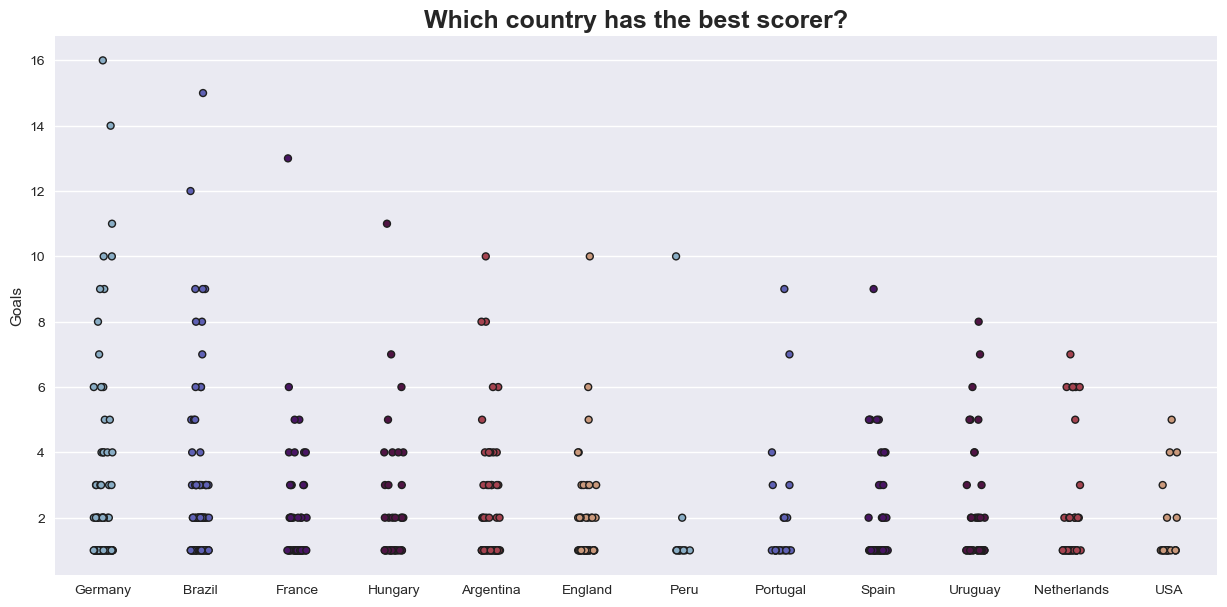

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
#sns.despine(offset=1, trim=True);

cpal=sns.color_palette("twilight")
plt.style.use("seaborn-dark")

ax = sns.stripplot(data=country, x="Country", y="Goals", jitter = True, linewidth = 1, palette = cpal)
ax.set_title('Which country has the best scorer?', fontweight='bold', fontsize=18)
ax.set(xlabel=None)
plt.savefig('scorer.png')
plt.show()

# 4.	Is there a difference or advantage when being a Home team or Away team?

In [27]:
worldcups["Runners-Up"].replace('Germany FR','Germany',inplace=True)
worldcups["Winner"].replace('Germany FR','Germany',inplace=True)
worldcups["Country"].replace('Germany FR','Germany',inplace=True)
worldcups["Third"].replace('Germany FR','Germany',inplace=True)

In [28]:
worldcups["Runners-Up"].value_counts()

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [29]:
runner_up = worldcups.groupby(['Runners-Up']).count()
runner_up

,Country,Winner,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Runners-Up,,,,,,,,
Argentina,3,3,3,3,3,3,3,3
Brazil,2,2,2,2,2,2,2,2
Czechoslovakia,2,2,2,2,2,2,2,2
France,1,1,1,1,1,1,1,1
Germany,4,4,4,4,4,4,4,4
Hungary,2,2,2,2,2,2,2,2
Italy,2,2,2,2,2,2,2,2
Netherlands,3,3,3,3,3,3,3,3
Sweden,1,1,1,1,1,1,1,1


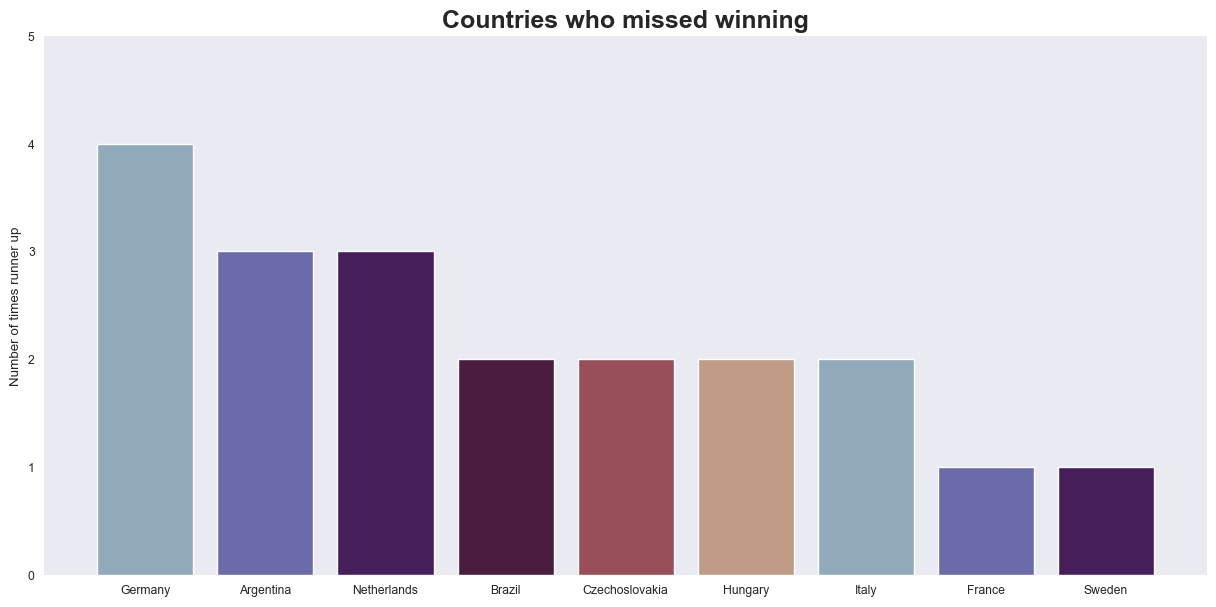

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

cpal=sns.color_palette("twilight")
plt.style.use("seaborn-dark")



ax = sns.barplot(x = runner_up.index,
            y = runner_up['Country'],
            data = runner_up, order=runner_up.sort_values('Country',ascending = False).index, linewidth = 1, palette = cpal)

ax.set_title('Countries who missed winning', fontweight='bold', fontsize=18)
ax.set(xlabel=None)
ax.set(ylabel='Number of times runner up')
ax.relim()
ax.autoscale_view()
ax.margins(y=0.1) 
ax.set(ylim=(0, 5))
#plt.savefig('scorer.png')
plt.show()

In [31]:
worldcups_winners = worldcups[['Winner', 'Runners-Up', 'Third']]

In [32]:
first = worldcups_winners['Winner'].value_counts()
second = worldcups_winners['Runners-Up'].value_counts()
third = worldcups_winners['Third'].value_counts()

In [33]:
#combine dataframes
winners = pd.concat([first, second, third], axis = 1)
winners.fillna(0, inplace=True)
winners.astype(int)
winners.reset_index(inplace=True)
winners

,index,Winner,Runners-Up,Third
0,Brazil,5.0,2.0,2.0
1,Italy,4.0,2.0,1.0
2,Germany,4.0,4.0,4.0
3,Uruguay,2.0,0.0,0.0
4,Argentina,2.0,3.0,0.0
5,England,1.0,0.0,0.0
6,France,1.0,1.0,2.0
7,Spain,1.0,0.0,0.0
8,Netherlands,0.0,3.0,1.0
9,Czechoslovakia,0.0,2.0,0.0


In [34]:
winners = winners.rename({'Runners-Up': '1st Runner-up', 'Third': '2nd Runner-up'}, axis=1)
winners.head()

,index,Winner,1st Runner-up,2nd Runner-up
0,Brazil,5.0,2.0,2.0
1,Italy,4.0,2.0,1.0
2,Germany,4.0,4.0,4.0
3,Uruguay,2.0,0.0,0.0
4,Argentina,2.0,3.0,0.0


In [35]:
#melt into singular dataframe
winners_melt = pd.melt(winners, id_vars='index', var_name='result', value_name='counts')
winners_melt.head()

,index,result,counts
0,Brazil,Winner,5.0
1,Italy,Winner,4.0
2,Germany,Winner,4.0
3,Uruguay,Winner,2.0
4,Argentina,Winner,2.0


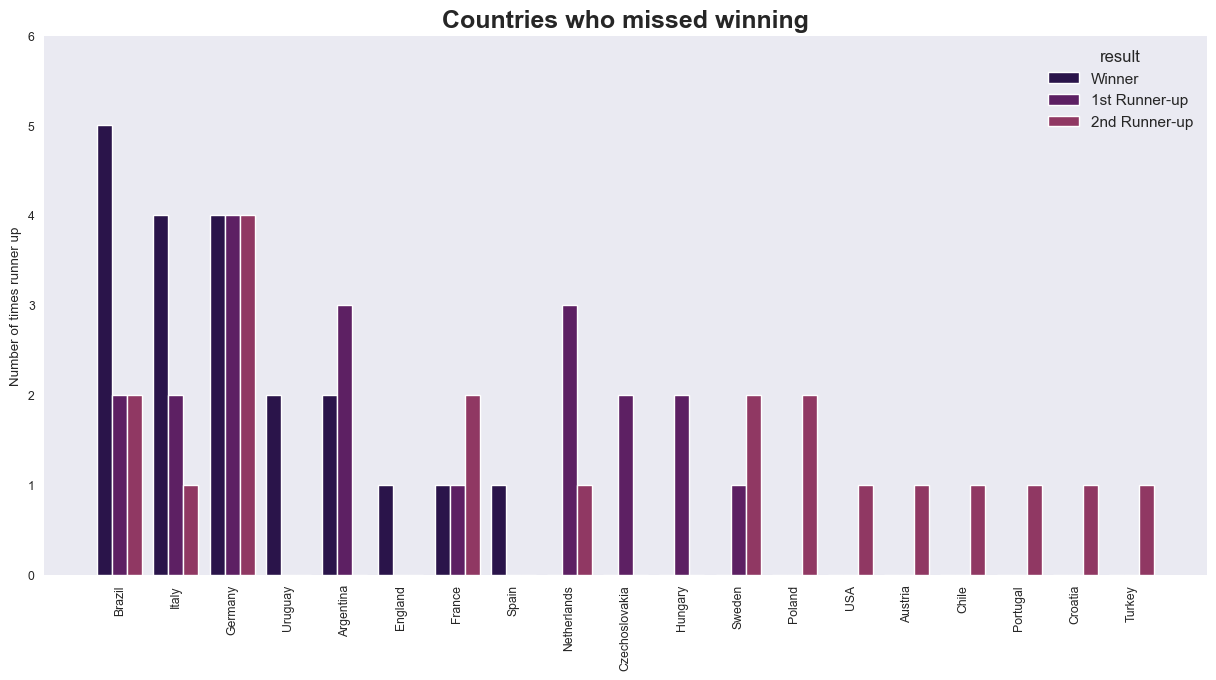

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set()
cpal=sns.color_palette("inferno")
plt.style.use("seaborn-dark")



ax = sns.barplot(x = 'index', y = 'counts', hue = 'result',
            data = winners_melt, palette = cpal)

ax.set_title('Countries who missed winning', fontweight='bold', fontsize=18)
ax.set(xlabel=None)
ax.set(ylabel='Number of times runner up')
ax.relim()
ax.autoscale_view()
#ax.margins(x=.01) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set(ylim=(0, 6))
#plt.savefig('scorer.png')
plt.show()

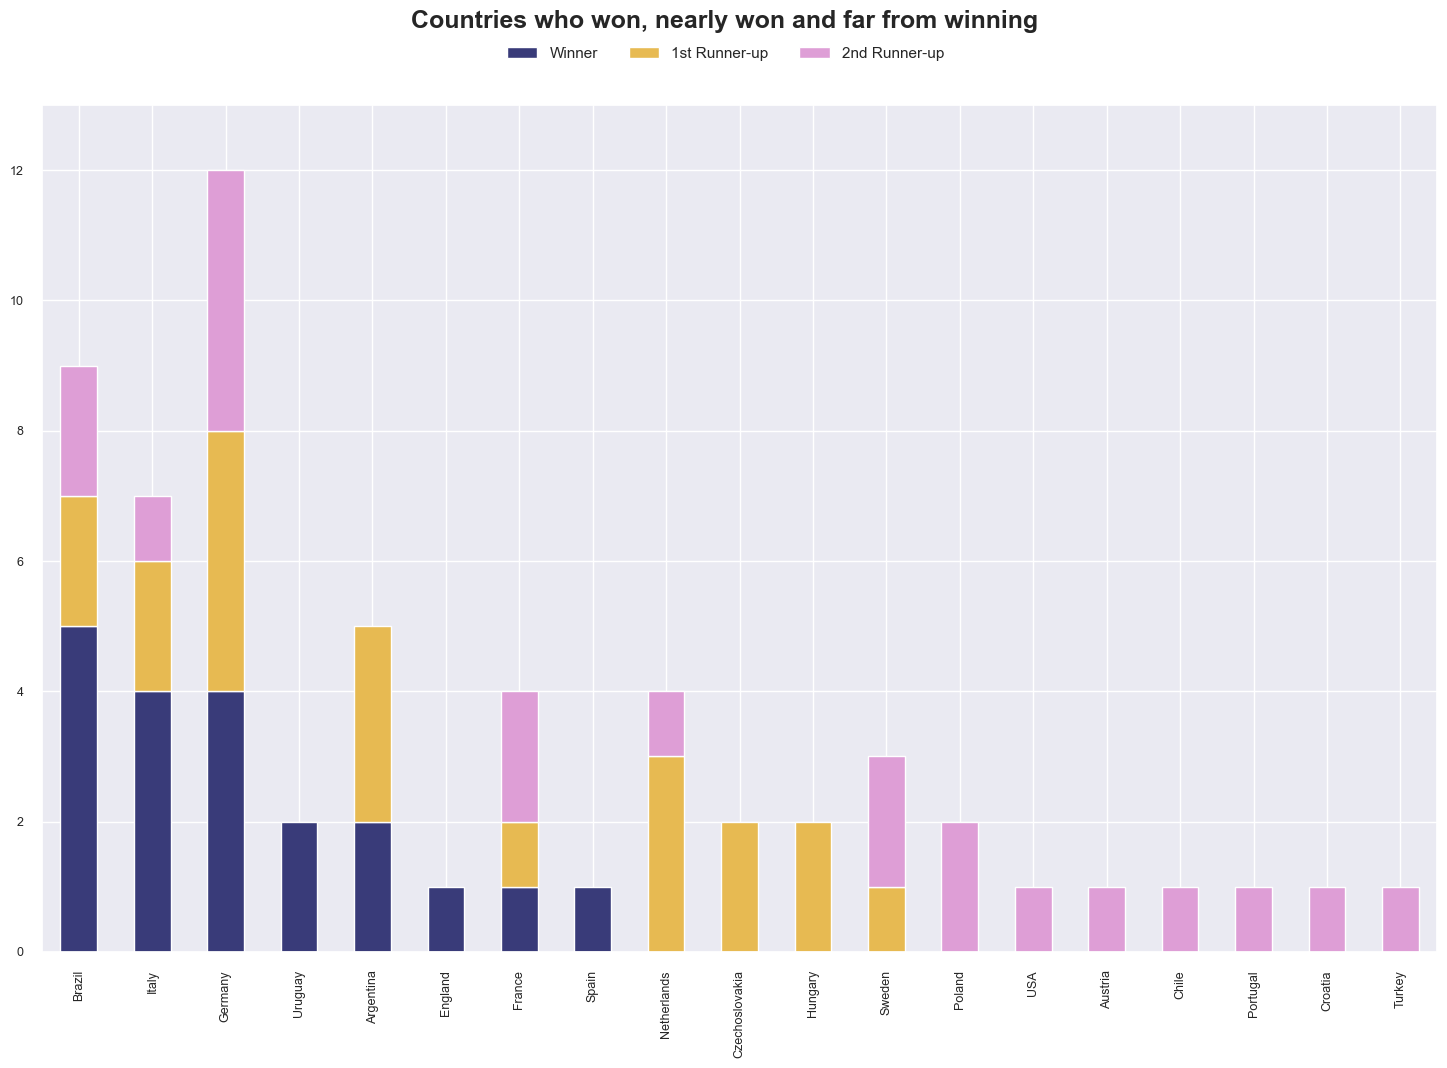

In [37]:
sns.set()
#plt.style.use("seaborn-dark")

ax = winners.set_index('index').plot(kind='bar', stacked=True, linewidth=1,figsize=(18,11), legend=True, colormap = plt.cm.tab20b)
plt.figtext(.33,.95,"Countries who won, nearly won and far from winning", fontweight="bold", fontsize=18)
ax.set(xlabel=None)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9, rotation=90)
ax.set(ylim=(0, 13))
ax.margins(y=0.1) 
plt.legend(loc="center", ncol=len(winners.columns), bbox_to_anchor=(0.49,1.06))
plt.savefig('win.png')
plt.show()

# 5. Which country is the strongest team?

In [38]:
matches['Year'] = matches.index

In [39]:
matches['Year'] = pd.to_datetime(matches['Year']).dt.strftime('%Y')

In [40]:
matches.dtypes

Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
Year                     object
dtype: object

In [41]:
# remove own index with default index
matches.reset_index(inplace = True, drop = True)

In [42]:
matches.head(5)

,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Year
0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,1930
1,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,1930
2,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,1930
3,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,1930
4,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1930


C:\Users\yudhi\AppData\Local\Temp\ipykernel_7004\513046519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home["type"] = "Home Team Goals"
C:\Users\yudhi\AppData\Local\Temp\ipykernel_7004\513046519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away["type"] = "Away Team Goals"
C:\Users\yudhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other

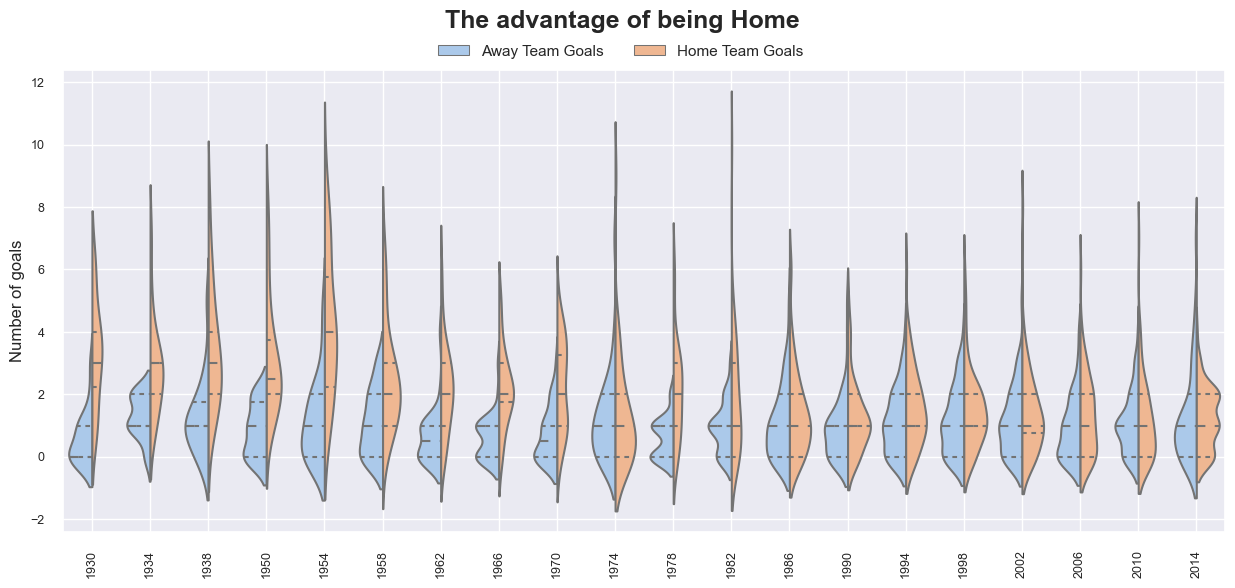

In [43]:
home = matches[["Year","Home Team Goals"]]
home.columns = ["year","goals"]
home["type"] = "Home Team Goals"

away = matches[["Year","Away Team Goals"]]
away.columns = ["year","goals"]
away["type"] = "Away Team Goals"

home_away = pd.concat([away,home],axis=0)

plt.figure(figsize=(15,6))
ax = sns.violinplot(home_away["year"],home_away["goals"],
               hue=home_away["type"],split=True,inner="quart", palette="pastel")
plt.grid(True)
plt.figtext(.38,.95,"The advantage of being Home", fontweight="bold", fontsize=18)
ax.set(xlabel=None)
ax.set(ylabel='Number of goals')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9, rotation=90) 
plt.legend(loc="center", ncol=len(winners.columns), bbox_to_anchor=(0.48,1.04))
plt.savefig('violin.png')
plt.show()